In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
data=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')

In [3]:
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
data.shape

(1436, 38)

In [5]:
data.size

54568

In [6]:
data.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [8]:
data=data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [9]:
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [10]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


#### correlation

In [11]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [12]:
data=data.rename({'Age_08_04':'age','CC':'cc','Quarterly_Tax':'qt',"KM":"km","HP":"hp","Doors":"doors","Gears":"gears","Weight":"weight","Price":"price"},axis=1)

In [13]:
data

,price,age,km,hp,cc,doors,gears,qt,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [14]:
data[data.duplicated()]

,price,age,km,hp,cc,doors,gears,qt,weight
113,24950,8,13253,116,2000,5,5,234,1320


In [15]:
data=data.drop_duplicates().reset_index(drop=True)

In [16]:
data

,price,age,km,hp,cc,doors,gears,qt,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


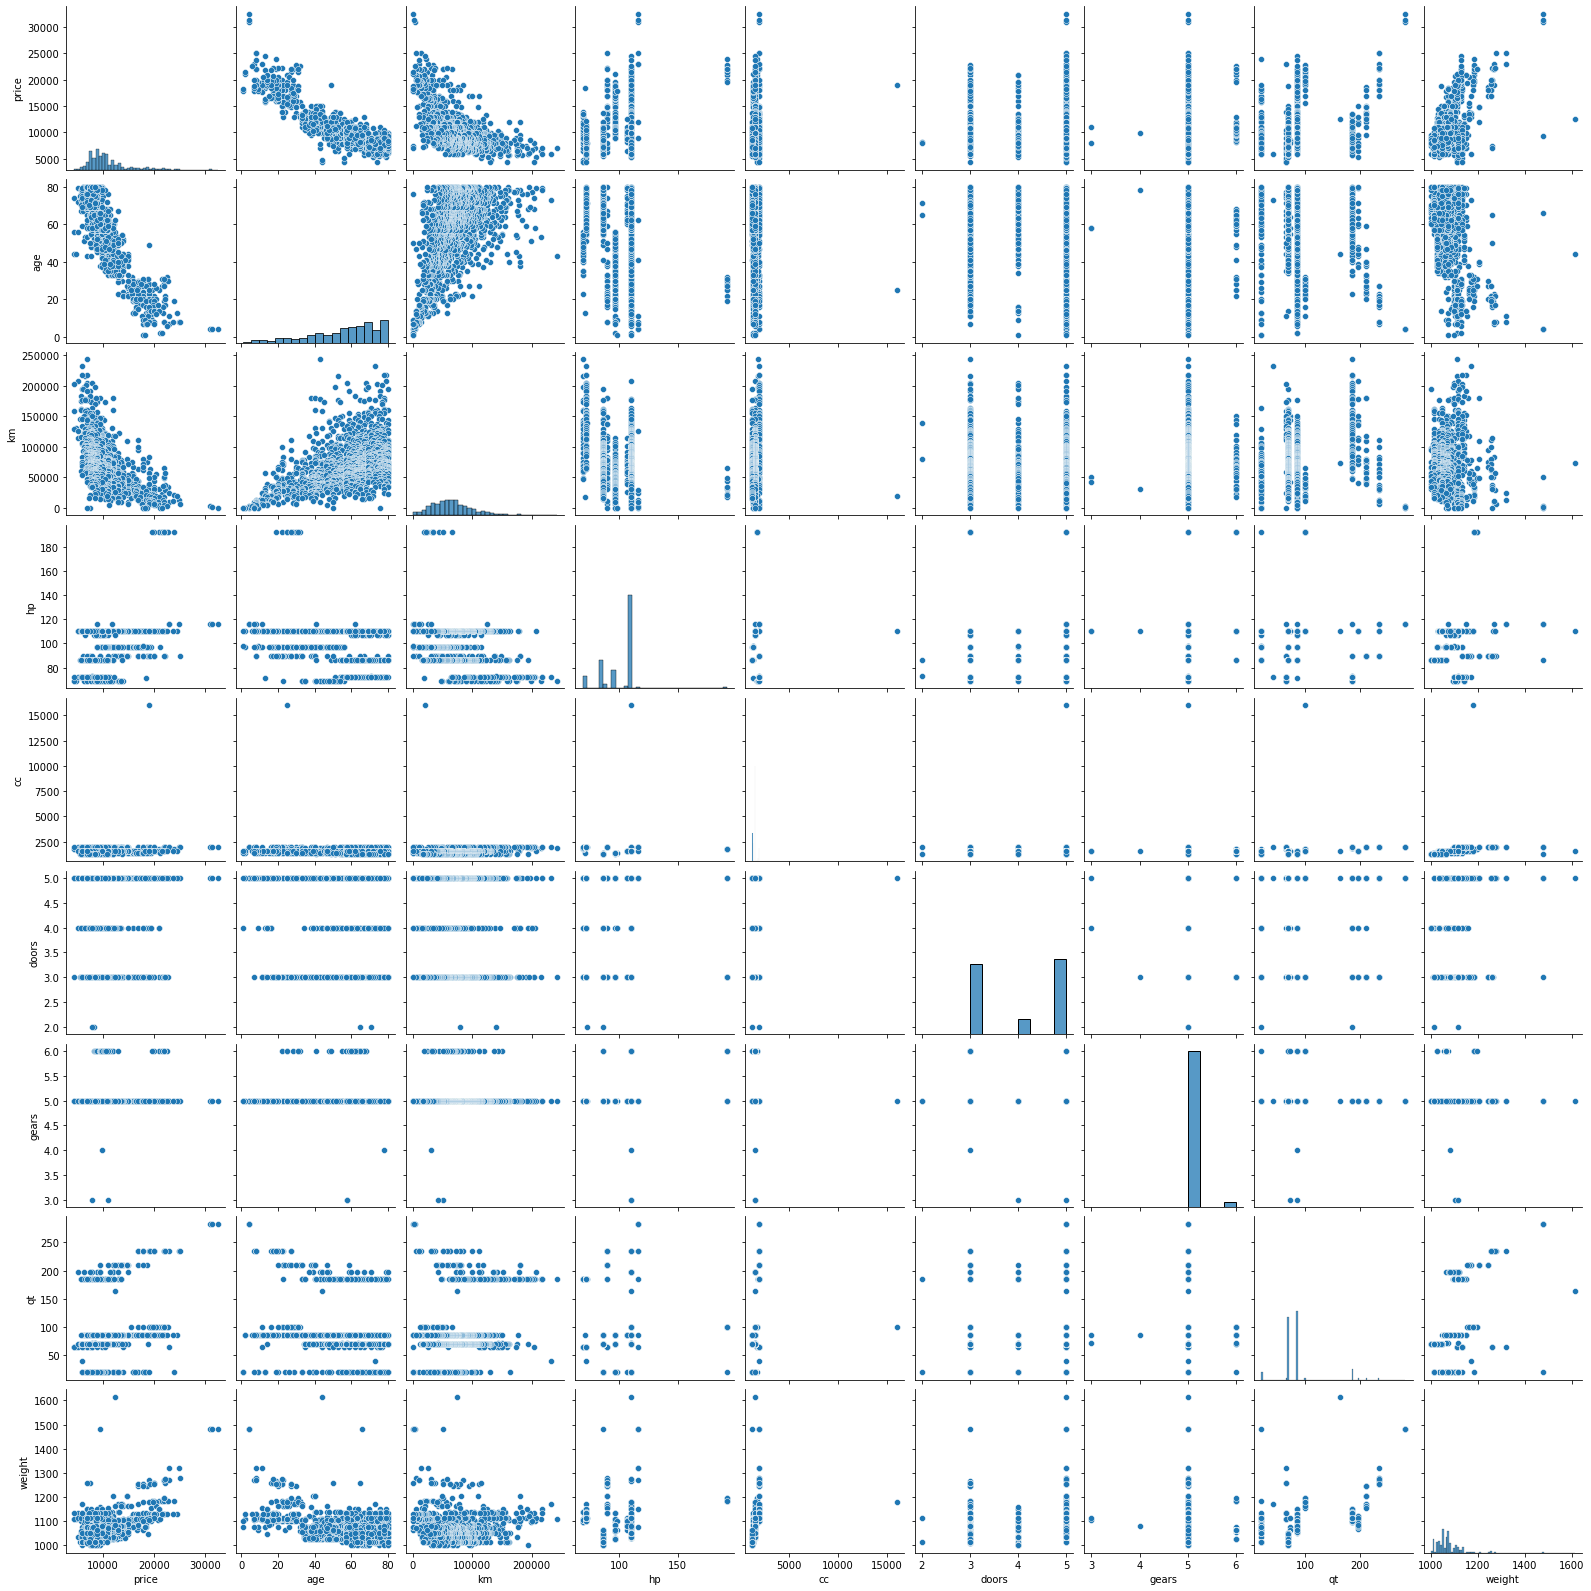

In [17]:
sns.pairplot(data)

### model building

In [18]:
model=smf.ols("price~age+km+hp+cc+doors+gears+qt+weight",data=data).fit()

In [19]:
model

In [20]:
model.params

Intercept   -5472.540368
age          -121.713891
km             -0.020737
hp             31.584612
cc             -0.118558
doors          -0.920189
gears         597.715894
qt              3.858805
weight         16.855470
dtype: float64

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:29:30   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
km            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
hp            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
gears        597.7159    196.969      3.035      0.002     211.335     984.097
qt             3.8588      1.311      2.944      0.003       1.288       6.430
weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model.rsquared, model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

In [23]:
model.tvalues, model.pvalues

(Intercept    -3.875273
 age         -46.551876
 km          -16.552424
 hp           11.209719
 cc           -1.316436
 doors        -0.023012
 gears         3.034563
 qt            2.944198
 weight       15.760663
 dtype: float64,
 Intercept     1.113392e-04
 age          1.879217e-288
 km            1.994713e-56
 hp            5.211155e-28
 cc            1.882393e-01
 doors         9.816443e-01
 gears         2.452430e-03
 qt            3.290363e-03
 weight        1.031118e-51
 dtype: float64)

### building SLR and MLR for CC and DOORS

In [24]:
slr_cc=smf.ols("price~cc",data=data).fit()

In [25]:
slr_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           2.29e-06
Time:                        12:29:30   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
slr_cc.tvalues , slr_cc.pvalues

(Intercept    24.879592
 cc            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [27]:
slr_doors=smf.ols("price~doors",data=data).fit()

In [28]:
slr_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           2.40e-12
Time:                        12:29:30   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
slr_doors.tvalues , slr_doors.pvalues

(Intercept    19.421546
 doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 doors        2.404166e-12
 dtype: float64)

In [30]:
slr_cd=smf.ols("price~cc+doors",data=data).fit()

In [31]:
slr_cd

In [32]:
slr_cd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           2.55e-15
Time:                        12:29:30   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
slr_cd.tvalues , slr_cd.pvalues

(Intercept    12.786341
 cc            4.268006
 doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 cc           2.101878e-05
 doors        2.109558e-11
 dtype: float64)

### model  validation techniques

 1) collinearity  ckeack,2) residual cheack

In [48]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables
# take all independent variables alternatively and put at a place of (depenedent ~ independent) and chaeking data


In [49]:
rsq_age=smf.ols('age~km+hp+cc+doors+gears+qt+weight',data=data).fit().rsquared
vif_age=1/(1-rsq_age)

In [50]:
rsq_km=smf.ols('km~age+hp+cc+doors+gears+qt+weight',data=data).fit().rsquared
vif_km=1/(1-rsq_age)

In [51]:
rsq_hp=smf.ols('hp~km+age+cc+doors+gears+qt+weight',data=data).fit().rsquared
vif_hp=1/(1-rsq_age)

In [52]:
rsq_cc=smf.ols('cc~km+hp+age+doors+gears+qt+weight',data=data).fit().rsquared
vif_cc=1/(1-rsq_age)

In [53]:
rsq_doors=smf.ols('doors~km+hp+cc+age+gears+qt+weight',data=data).fit().rsquared
vif_doors=1/(1-rsq_age)

In [54]:
rsq_gears=smf.ols('gears~km+hp+cc+doors+age+qt+weight',data=data).fit().rsquared
vif_gears=1/(1-rsq_age)

In [55]:
rsq_qt=smf.ols('qt~km+hp+cc+doors+gears+age+weight',data=data).fit().rsquared
vif_qt=1/(1-rsq_age)

In [56]:
rsq_wt=smf.ols('weight~km+hp+cc+doors+gears+qt+age',data=data).fit().rsquared
vif_wt=1/(1-rsq_age)

In [57]:
# Putting the values in Dataframe format
data1={'variables':['age','km','hp','cc','doors','gears','qt','weight'],
    'vif':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_wt]}
vif_data=pd.DataFrame(data1)

In [58]:
vif_data

,variables,vif
0,age,1.876236
1,km,1.876236
2,hp,1.876236
3,cc,1.876236
4,doors,1.876236
5,gears,1.876236
6,qt,1.876236
7,weight,1.876236


In [ ]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

#### Residual Analysis by q-q plot

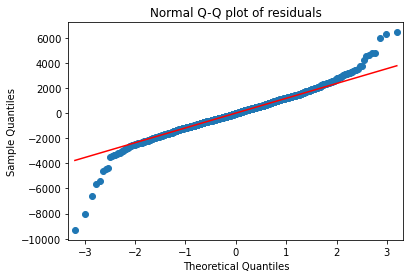

In [59]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [60]:
# outliar detection from above QQ plot of residuals


list(np.where(model.resid>4000)), list(np.where(model.resid<-4000))

([array([ 109,  110,  111,  124,  146,  170,  522, 1057], dtype=int64)],
 [array([190, 191, 220, 392, 401, 600, 653, 959], dtype=int64)])

In [61]:
list(np.where(model.resid>6000)), list(np.where(model.resid<-6000))

([array([109, 146, 522], dtype=int64)], [array([220, 600, 959], dtype=int64)])

In [62]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def get_standard_values(vals): 
    return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

In [63]:
model.fittedvalues, model.resid

(0       16791.958871
 1       16253.800414
 2       16779.635210
 3       16405.789389
 4       16200.217277
             ...     
 1430     8794.255037
 1431     8292.577342
 1432     8455.434402
 1433     8579.222041
 1434    10396.087526
 Length: 1435, dtype: float64,
 0      -3291.958871
 1      -2503.800414
 2      -2829.635210
 3      -1455.789389
 4      -2450.217277
            ...     
 1430   -1294.255037
 1431    2552.422658
 1432      44.565598
 1433   -1329.222041
 1434   -3446.087526
 Length: 1435, dtype: float64)

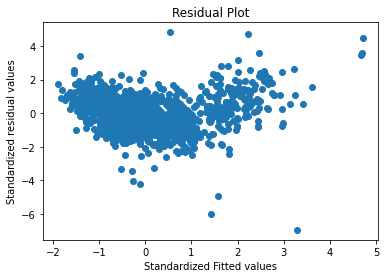

In [64]:
# checking similarity(relationship) by use of scatter plot

plt.scatter(get_standard_values(model.fittedvalues),
            get_standard_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [65]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    
# exog = x-variable & endog = y-variable

eval_env: 1


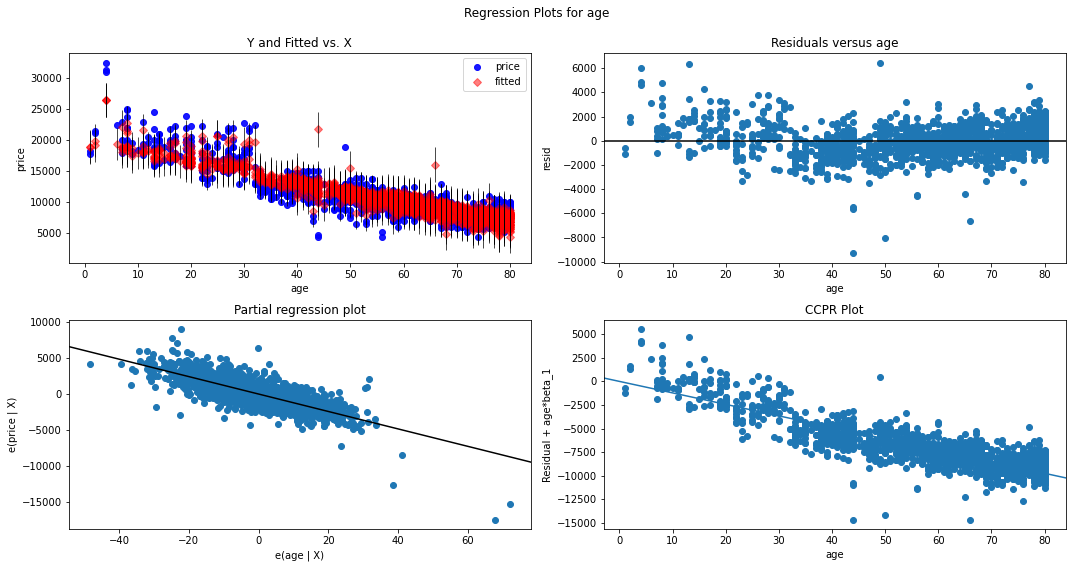

In [66]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'age',fig=fig)
plt.show()

eval_env: 1


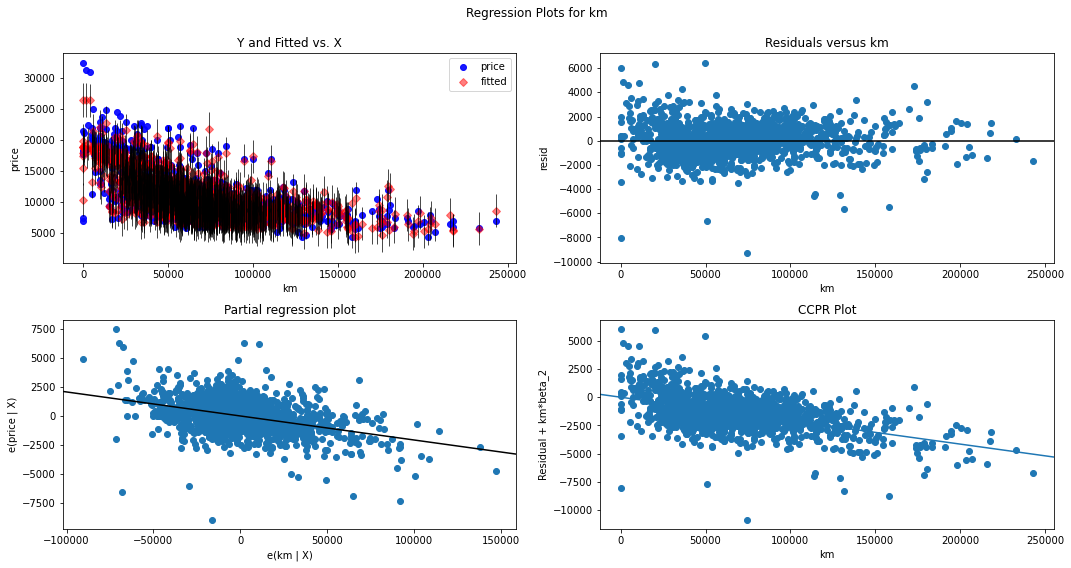

In [67]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'km',fig=fig)
plt.show()

eval_env: 1


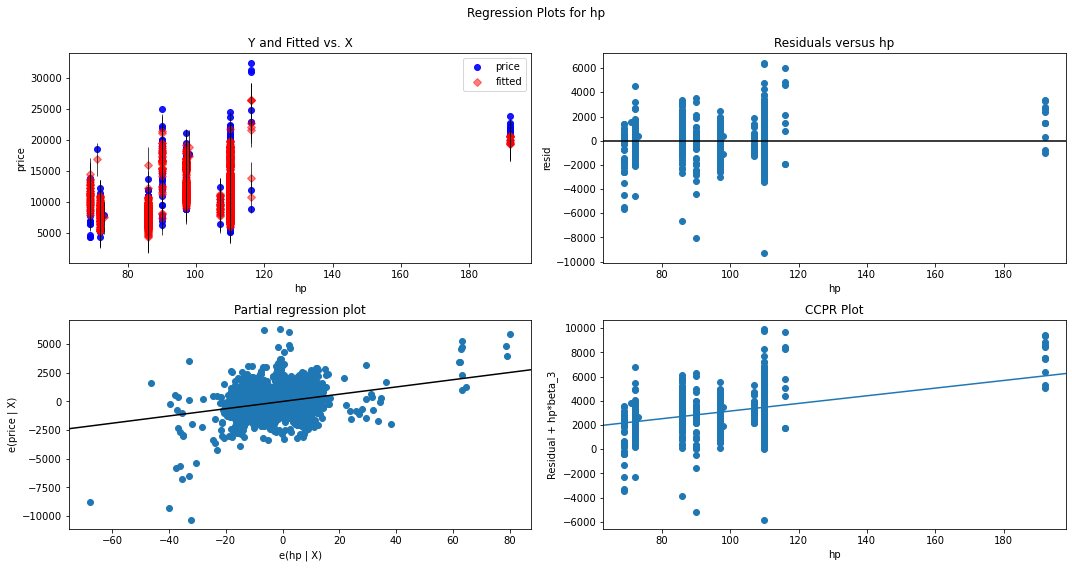

In [68]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'hp',fig=fig)
plt.show()

eval_env: 1


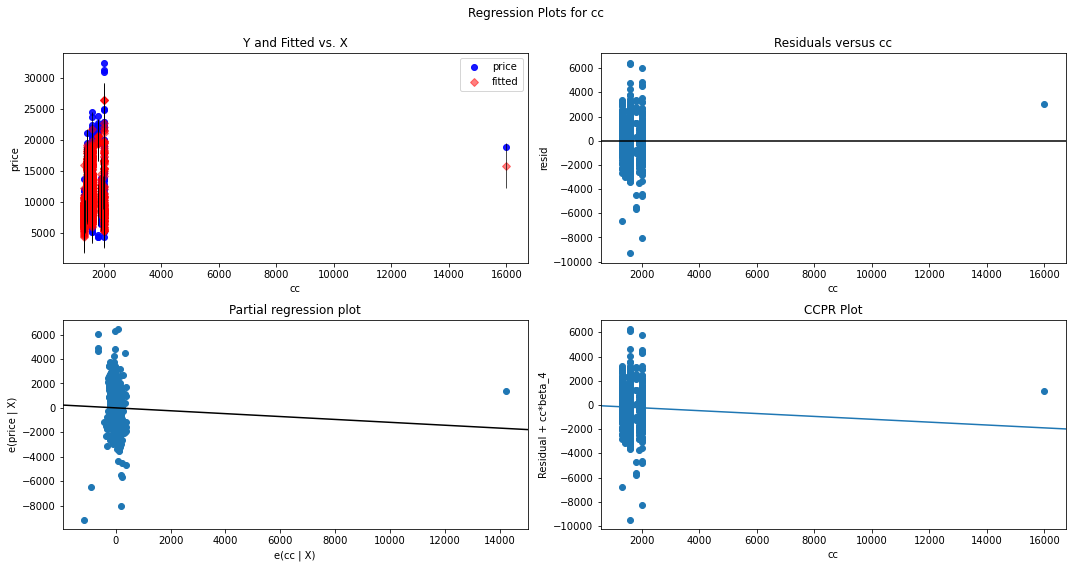

In [69]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

eval_env: 1


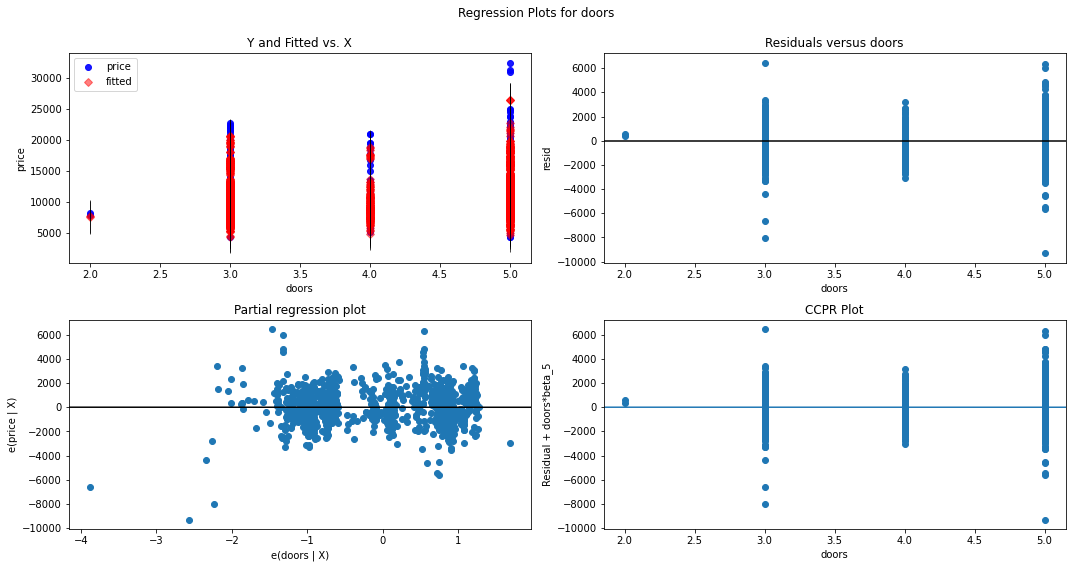

In [70]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'doors',fig=fig)
plt.show()

eval_env: 1


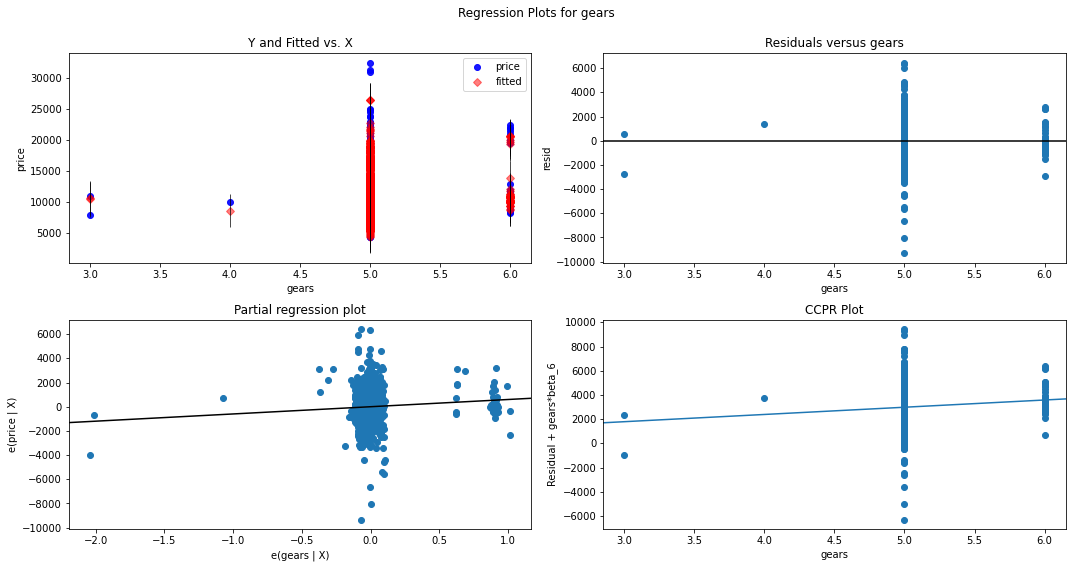

In [71]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'gears',fig=fig)
plt.show()

eval_env: 1


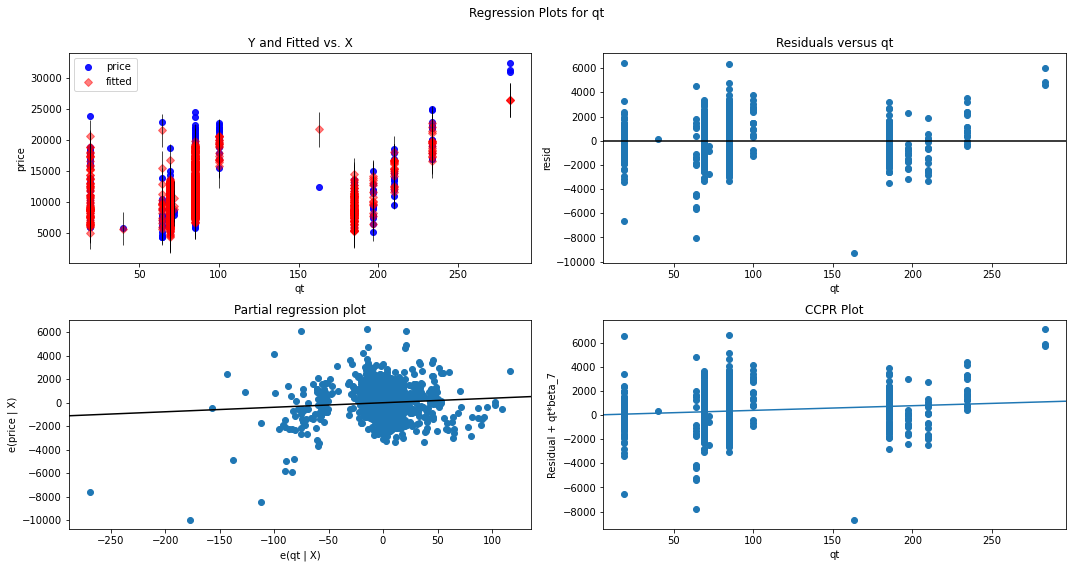

In [72]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'qt',fig=fig)
plt.show()

eval_env: 1


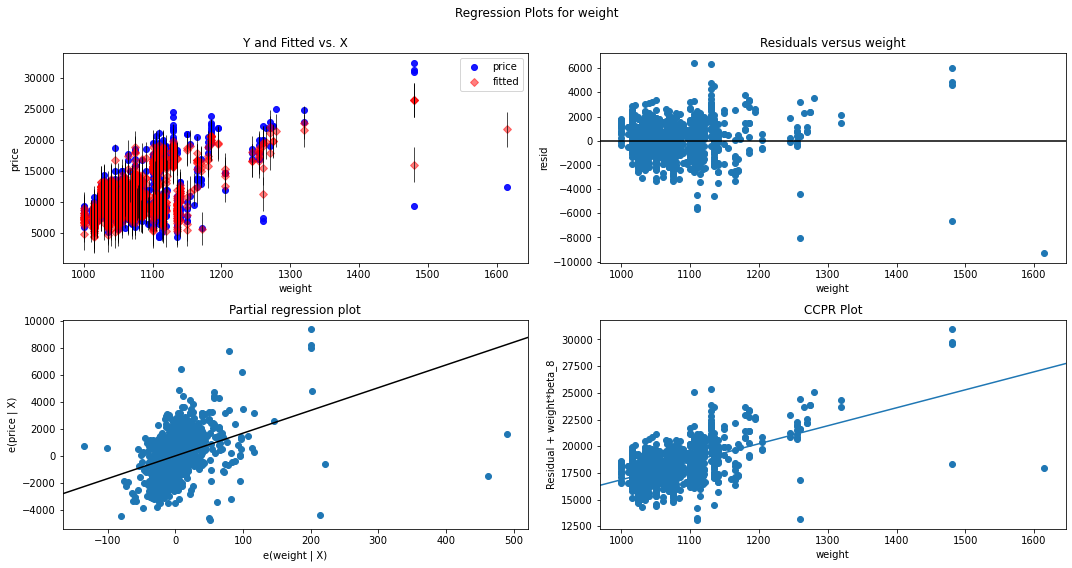

In [73]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'weight',fig=fig)
plt.show()

 Model Deletion Diagnostics (checking Outliers or Influencers)
Two Techniques : 1. Cook's Distance & 2. Leverage value

In [74]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

In [75]:
# Index and value of influencer where C>0.5

c.max(), c.argmax()

(78.7295058224984, 80)

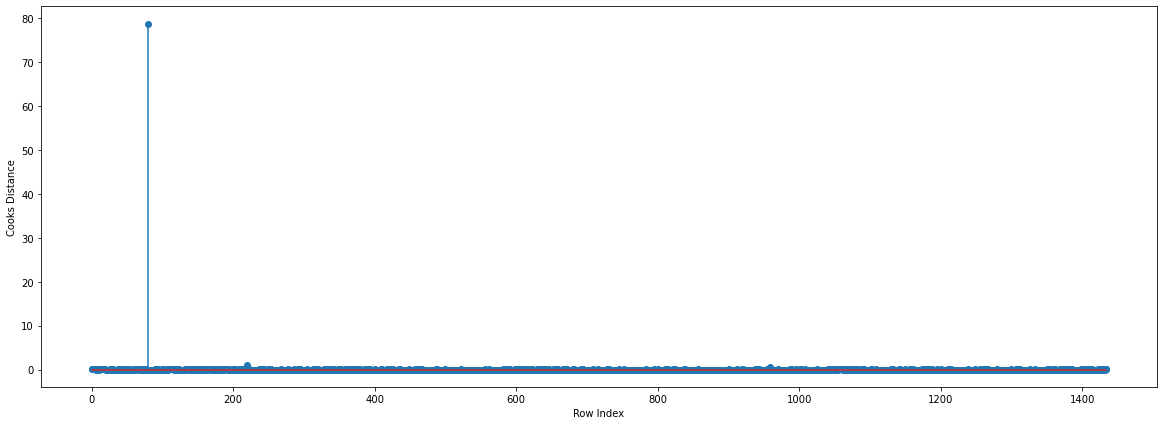

In [76]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [79]:
data[data.index.isin([80])]

,price,age,km,hp,cc,doors,gears,qt,weight
80,18950,25,20019,110,16000,5,5,100,1180


In [80]:
# droping the two columns

data_new=data.drop(data.index[[80]],axis=0).reset_index().drop(['index'],axis=1)

data_new.head()

,price,age,km,hp,cc,doors,gears,qt,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


 Building Our Final Model

In [82]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('price~age+km+hp+cc+doors+gears+qt+weight',data=data).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data=data.drop(data.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data
    else:
        final_model=smf.ols('price~age+km+hp+cc+doors+gears+qt+weight',data=data).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612916
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057647
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.893954642514717
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139028
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147553
Thus model accuracy is improved to 0.8949455651565241
Thus model accuracy is improv

In [83]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:07:24   Log-Likelihood:                -11038.
No. Observations:                1330   AIC:                         2.209e+04
Df Residuals:                    1321   BIC:                         2.214e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.864e+04   1513.105    -12.316      0.000   -2.16e+04   -1.57e+04
age         -108.2573      2.181    -49.648      0.000    -112.535    -103.980
km            -0.0155      0.001    -14.830      0.000      -0.018      -0.013
hp             7.8533      3.037      2.586      0.010       1.895      13.812
cc            -2.2731      0.291     -7.799      0.000      -2.845      -1.701
doors       -149.1873     32.432     -4.600      0.000    -212.811     -85.563
gears        251.4363    163.559      1.537      0.124     -69.428     572.301
qt           -11.6187      1.626     -7.144      0.000     -14.809      -8.428
weight        36.9768      1.446     25.566      0.000      34.139      39.814
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                     4.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Final model accuracy increased by 90%

In [88]:
new_data=pd.DataFrame({'age':18,"km":80000,"hp":60,"cc":1000,"doors":4,"gears":6,"qt":70,"weight":1012},index=[0])
new_data

,age,km,hp,cc,doors,gears,qt,weight
0,18,80000,60,1000,4,6,70,1012


In [89]:
model.predict(new_data)

0    13901.125097
dtype: float64

In [90]:
Prediction=model.predict(data)
Prediction

0       15329.991147
1       15389.233919
2       15287.734792
3       14725.017923
4       17524.593192
            ...     
1325     7604.954881
1326     9203.051136
1327     8532.098968
1328     8670.833903
1329     8780.570061
Length: 1330, dtype: float64

In [92]:
data["Price_Predictions"]=Prediction

In [102]:
data

,price,age,km,hp,cc,doors,gears,qt,weight,Price_Predictions
0,13750,23,72937,90,2000,3,5,210,1165,15329.991147
1,14950,26,48000,90,2000,3,5,210,1165,15389.233919
2,13750,30,38500,90,2000,3,5,210,1170,15287.734792
3,12950,32,61000,90,2000,3,5,210,1170,14725.017923
4,16900,27,94612,90,2000,3,5,210,1245,17524.593192
...,...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,1300,3,5,69,1015,7604.954881
1326,7500,69,20544,86,1300,3,5,69,1025,9203.051136
1327,10845,72,19000,86,1300,3,5,69,1015,8532.098968
1328,8500,71,17016,86,1300,3,5,69,1015,8670.833903
